In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
wine_data=pd.read_csv("/content/winequality-red.csv")

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
len(wine_data)

1599

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

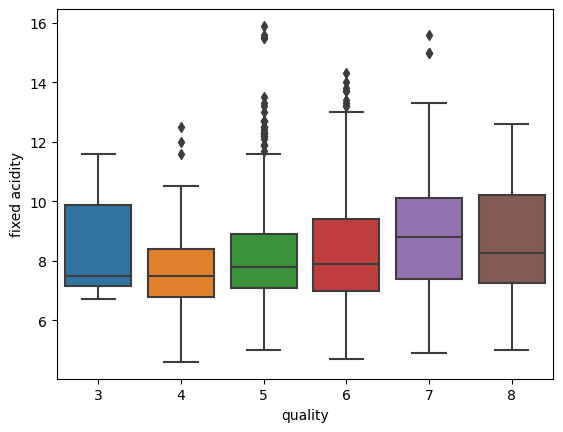

In [7]:
sns.boxplot(x=wine_data["quality"],y=wine_data["fixed acidity"])

<Axes: xlabel='quality', ylabel='fixed acidity'>

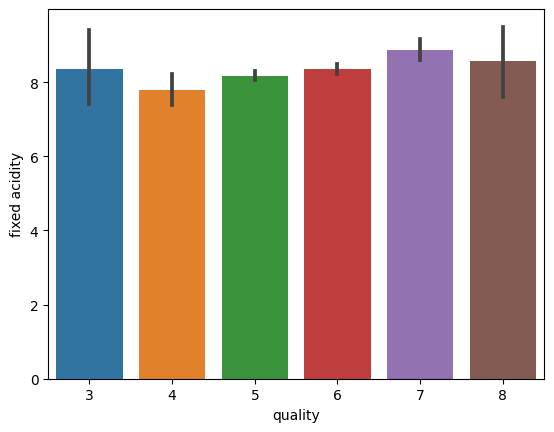

In [9]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

<Axes: >

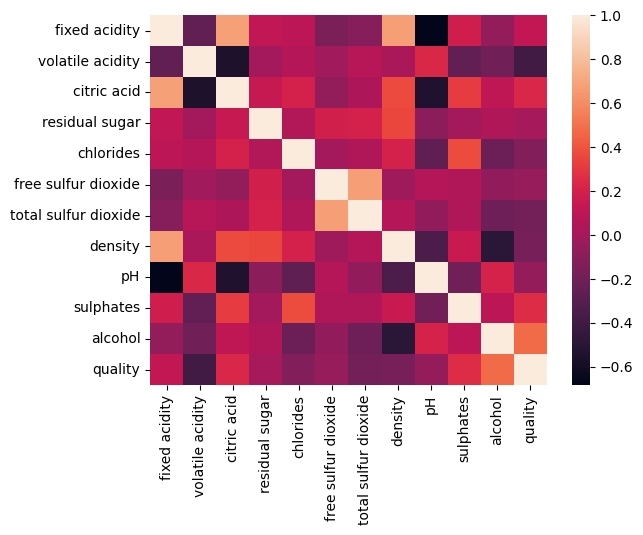

In [11]:
corr_val=wine_data.corr()
sns.heatmap(corr_val)

In [12]:
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [15]:
wine_data["quality"].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [17]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


In [18]:
wine_data["quality"]=wine_data["quality"].map({"bad":0,"good":1})

In [19]:
wine_data["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [25]:
x=wine_data.iloc[:,:11].values
y=wine_data.iloc[:,-1].values

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
print("x_train: ",len(x_train))
print("y_train: ",len(x_train))
print("x_test: ",len(x_test))
print("y_test: ",len(y_test))

x_train:  1279
y_train:  1279
x_test:  320
y_test:  320


In [31]:
ssc_x=StandardScaler()
x_train=ssc_x.fit_transform(x_train)
x_test=ssc_x.transform(x_test)

In [32]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [34]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       273
           1       0.74      0.60      0.66        47

    accuracy                           0.91       320
   macro avg       0.83      0.78      0.80       320
weighted avg       0.90      0.91      0.91       320



In [35]:
confusion_matrix(y_test, pred_rfc)

array([[263,  10],
       [ 19,  28]])

In [41]:
svc = SVC()
svc.fit(x_train, y_train)
pred= svc.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [51]:
l_clf=LogisticRegression()
l_clf.fit(x_train,y_train)
l_pred=l_clf.predict(x_test)
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



In [52]:
confusion_matrix(y_test,l_pred)

array([[264,   9],
       [ 34,  13]])